In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore


In [37]:
data = pd.read_csv("../src/data/benin-malanville.csv")

# Display the first few rows
print(data.head())
data.head()

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [30]:
# Summary statistics count, mean, median, standard deviation, maximum value
print(data.describe())


                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.2000

In [31]:
# Check column data types and null values
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [32]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)




Missing Values:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [33]:
# Check for negative or invalid values in specific columns
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
for col in columns_to_check:
    if (data[col] < 0).any():
        print(f"Column {col} contains negative values.")
    else:
        print(f"Column {col} is clean (no negative values).")



Column GHI contains negative values.
Column DNI contains negative values.
Column DHI contains negative values.
Column ModA is clean (no negative values).
Column ModB is clean (no negative values).
Column WS is clean (no negative values).
Column WSgust is clean (no negative values).


In [34]:
# Detect outliers using Z-scores
z_scores = data[columns_to_check].apply(zscore)
outliers = (z_scores.abs() > 3).sum()
print("\nOutliers detected (Z-Score > 3):")
print(outliers)



Outliers detected (Z-Score > 3):
GHI         89
DNI          0
DHI       3738
ModA        27
ModB        63
WS        3109
WSgust    3500
dtype: int64


In [35]:

# Handle outliers (replace with NaN or other techniques)
for col in columns_to_check:
    data[col] = np.where(z_scores[col].abs() > 3, np.nan, data[col])

# Save cleaned data to a new file 
cleaned_file_path = '../src/data/cleaned/cleaned_dataset.csv'  
data.to_csv(cleaned_file_path, index=False)

print("\nData Quality Check Completed. Cleaned dataset saved.")


Data Quality Check Completed. Cleaned dataset saved.


C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_15668\1547402869.py:22: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\HP EliteBook\Desktop\KAIM week 0\Solar-Radiation-EDA\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


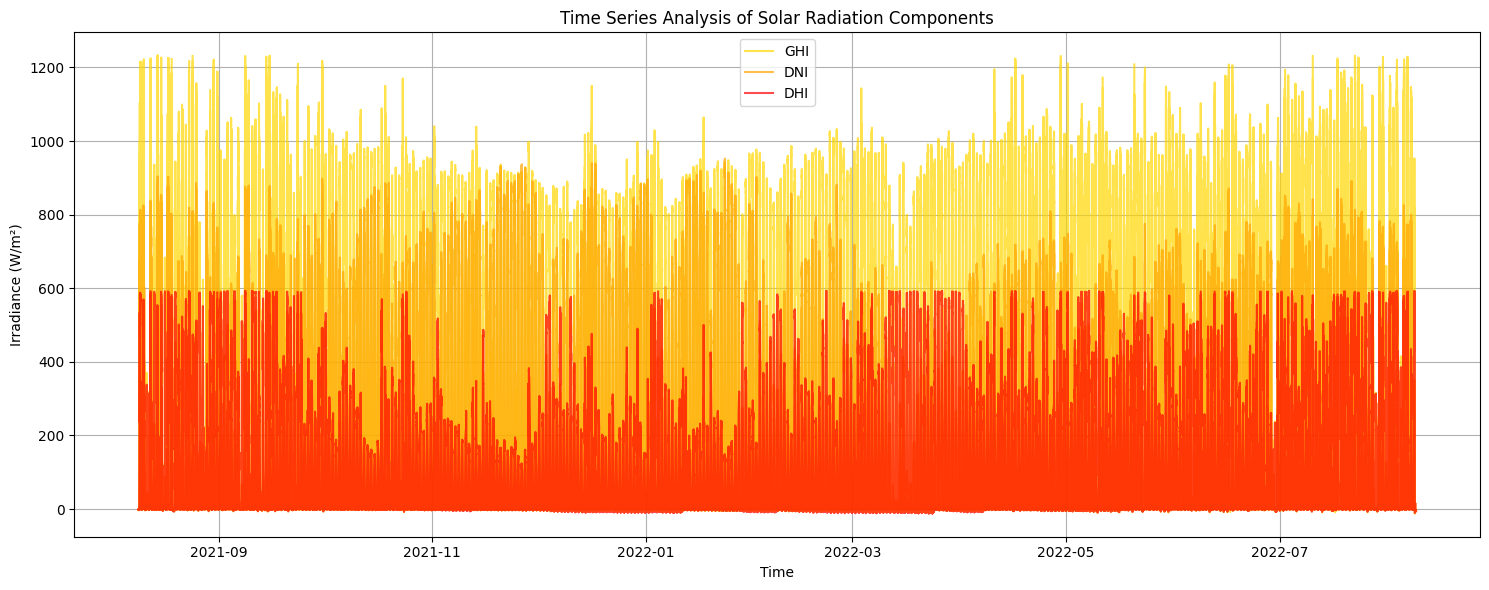

<Figure size 1200x600 with 0 Axes>

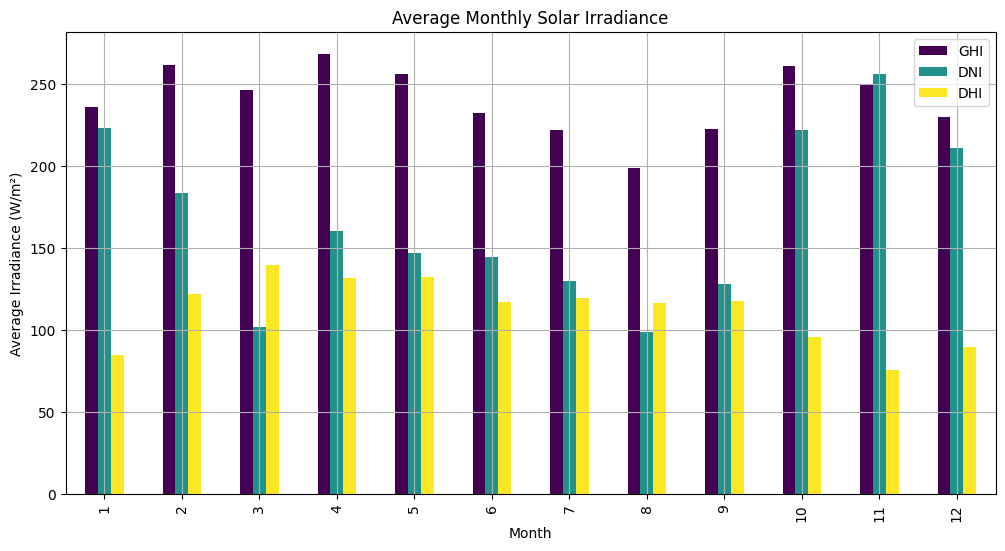

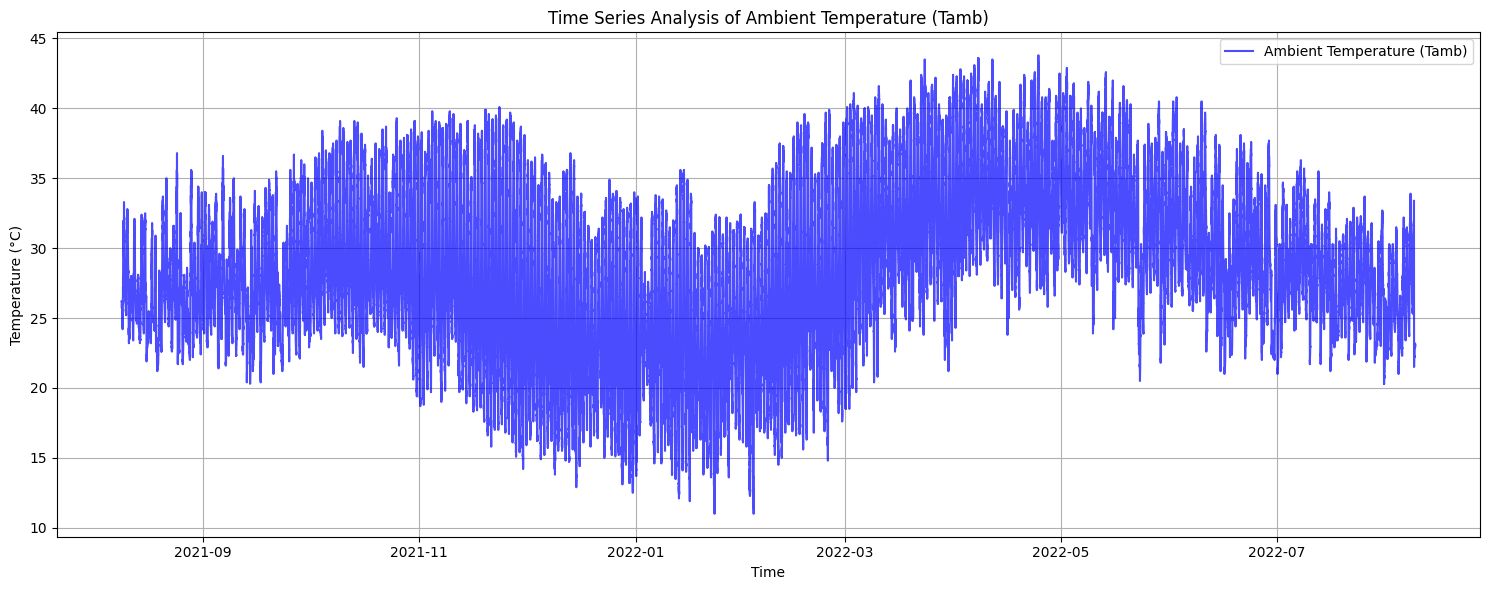

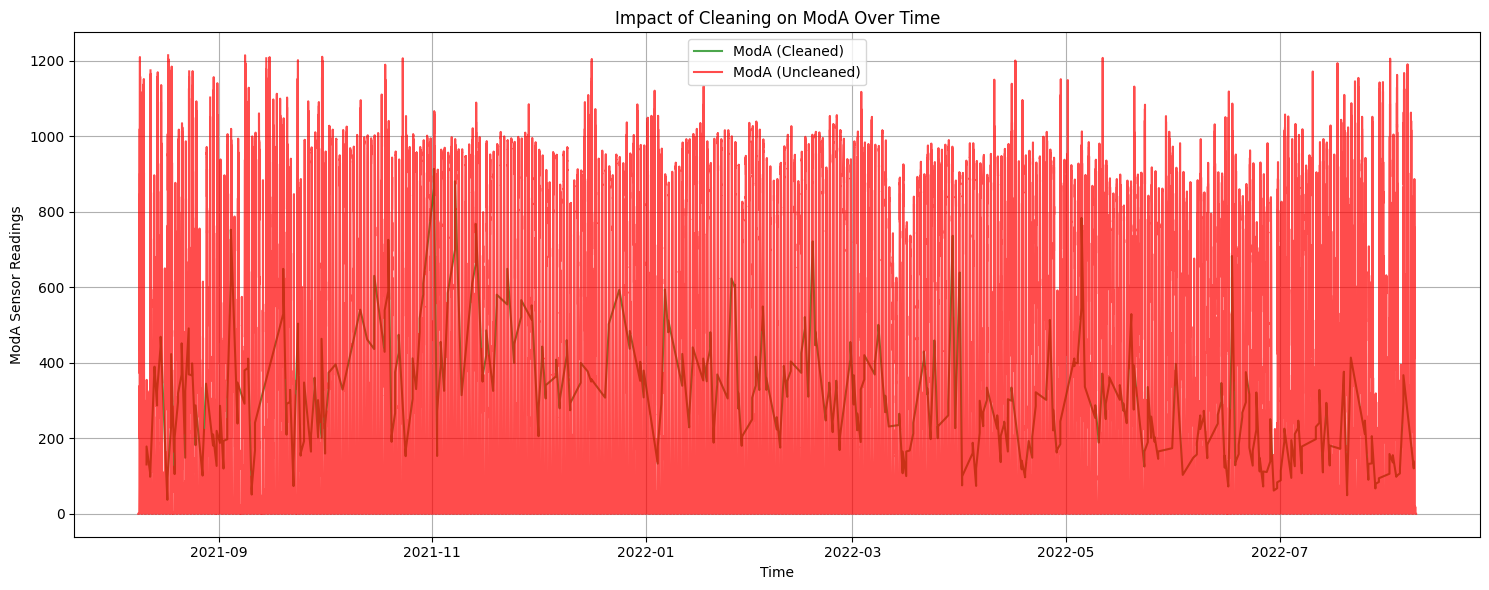

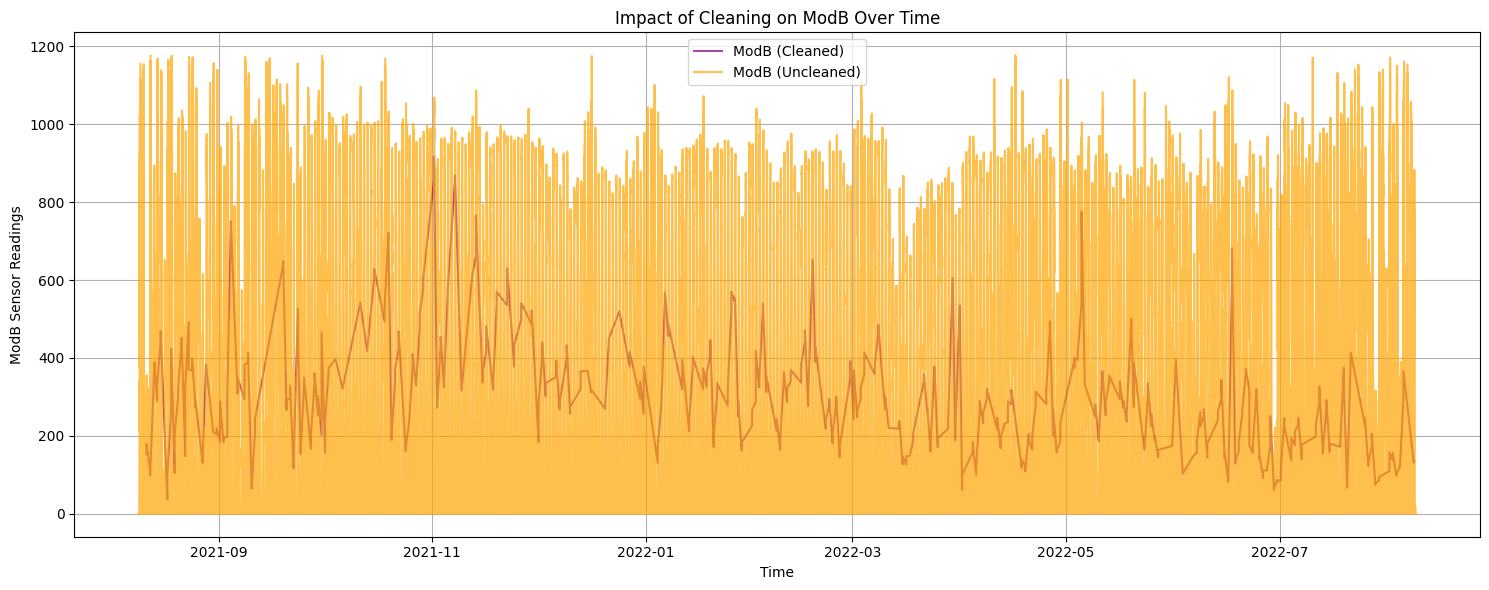

In [43]:
# Load the cleaned dataset 
data = pd.read_csv('../src/data/cleaned/cleaned_dataset.csv')
data.head()

# Ensure the 'Date' column is in datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])  

# Extract month and hour for analysis
data['Month'] = data['Timestamp'].dt.month
data['Hour'] = data['Timestamp'].dt.hour

# Plot GHI, DNI, DHI over time
plt.figure(figsize=(15, 6))
plt.plot(data['Timestamp'], data['GHI'], label='GHI', color='gold', alpha=0.7)
plt.plot(data['Timestamp'], data['DNI'], label='DNI', color='orange', alpha=0.7)
plt.plot(data['Timestamp'], data['DHI'], label='DHI', color='red', alpha=0.7)
plt.title('Time Series Analysis of Solar Radiation Components')
plt.xlabel('Time')
plt.ylabel('Irradiance (W/m²)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Analyze monthly patterns
plt.figure(figsize=(12, 6))
monthly_avg = data.groupby('Month')[['GHI', 'DNI', 'DHI']].mean()
monthly_avg.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Average Monthly Solar Irradiance')
plt.xlabel('Month')
plt.ylabel('Average Irradiance (W/m²)')
plt.grid(True)
plt.show()

# Plot temperature (Tamb) trends over time
plt.figure(figsize=(15, 6))
plt.plot(data['Timestamp'], data['Tamb'], label='Ambient Temperature (Tamb)', color='blue', alpha=0.7)
plt.title('Time Series Analysis of Ambient Temperature (Tamb)')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluate the impact of cleaning on ModA and ModB
cleaned_data = data[data['Cleaning'] == 1]  # Filter rows where cleaning has been applied
uncleaned_data = data[data['Cleaning'] == 0]

plt.figure(figsize=(15, 6))
plt.plot(cleaned_data['Timestamp'], cleaned_data['ModA'], label='ModA (Cleaned)', color='green', alpha=0.7)
plt.plot(uncleaned_data['Timestamp'], uncleaned_data['ModA'], label='ModA (Uncleaned)', color='red', alpha=0.7)
plt.title('Impact of Cleaning on ModA Over Time')
plt.xlabel('Time')
plt.ylabel('ModA Sensor Readings')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(cleaned_data['Timestamp'], cleaned_data['ModB'], label='ModB (Cleaned)', color='purple', alpha=0.7)
plt.plot(uncleaned_data['Timestamp'], uncleaned_data['ModB'], label='ModB (Uncleaned)', color='orange', alpha=0.7)
plt.title('Impact of Cleaning on ModB Over Time')
plt.xlabel('Time')
plt.ylabel('ModB Sensor Readings')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
